In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Preprocessing 
from sklearn.preprocessing import StandardScaler
#Otros 
from scipy.stats import norm
from scipy import stats
import warnings #nos sirve para ignorar los warnings que puedan aparecer. Se utiliza aca solo con fines esteticos
warnings.filterwarnings('ignore')
%matplotlib inline
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')
from IPython.display import Image

In [3]:
arboles = pd.read_csv(r'C:\Users\Alejandra\Google Drive\5° año\Ciencia de datos\tp\arbolado-publico-lineal.csv', delimiter=',')

In [4]:
arboles_parque = pd.read_csv(r'C:\Users\Alejandra\Google Drive\5° año\Ciencia de datos\tp\arbolado-en-espacios-verdes.csv', delimiter=',')

In [3]:
arboles.head()

,long,lat,tipo_sitio,id_arbol,altura_tot,diametro,inclinacio,id_especie,nombre_fam,nombre_gen,nombre_cie,nombre_com,tipo_folla,origen,codigo_man,barrio,comuna,calle,chapa1,chapa2
0,-58.389059,-34.620026,Árbol,2430,7,20,17,1,Oleáceas,Fraxinus,Fraxinus pennsylvanica,Fresno americano,Árbol Latifoliado Caducifolio,Exótico,14-017,CONSTITUCION,1,"Calvo, Carlos",1609,0
1,-58.389211,-34.620034,Árbol,2431,8,33,16,1,Oleáceas,Fraxinus,Fraxinus pennsylvanica,Fresno americano,Árbol Latifoliado Caducifolio,Exótico,14-017,CONSTITUCION,1,"Calvo, Carlos",1617,0
2,-58.389269,-34.620037,Árbol,2432,2,3,0,9,Oleáceas,Ligustrum,Ligustrum lucidum,Ligustro,Árbol Latifoliado Perenne,Exótico,14-017,CONSTITUCION,1,"Calvo, Carlos",1629,0
3,-58.389525,-34.620052,Árbol,2433,9,17,0,7,Aceráceas,Acer,Acer negundo,Arce negundo,Árbol Latifoliado Caducifolio,Exótico,14-017,CONSTITUCION,1,"Calvo, Carlos",0,0
4,-58.389608,-34.620057,Árbol,2434,6,13,14,1,Oleáceas,Fraxinus,Fraxinus pennsylvanica,Fresno americano,Árbol Latifoliado Caducifolio,Exótico,14-017,CONSTITUCION,1,"Calvo, Carlos",1655,0


In [5]:
arboles_parque.shape
arboles_parque.head()

,long,lat,id_arbol,altura_tot,diametro,inclinacio,id_especie,nombre_com,nombre_cie,tipo_folla,espacio_ve,ubicacion,nombre_fam,nombre_gen,origen,coord_x,coord_y
0,-58.477564,-34.645015,1,6,35,0,53,Washingtonia (Palmera washingtonia),Washingtonia filifera,Palmera,"AVELLANEDA, NICOLÁS, Pres.","DIRECTORIO, AV. - LACARRA, AV. - MONTE - AUTO...",Arecaceas,Washingtonia,Exótico,98692.305719,98253.300738
1,-58.477559,-34.645047,2,6,35,0,53,Washingtonia (Palmera washingtonia),Washingtonia filifera,Palmera,"AVELLANEDA, NICOLÁS, Pres.","DIRECTORIO, AV. - LACARRA, AV. - MONTE - AUTO...",Arecaceas,Washingtonia,Exótico,98692.751564,98249.733979
2,-58.477551,-34.645091,3,6,35,0,53,Washingtonia (Palmera washingtonia),Washingtonia filifera,Palmera,"AVELLANEDA, NICOLÁS, Pres.","DIRECTORIO, AV. - LACARRA, AV. - MONTE - AUTO...",Arecaceas,Washingtonia,Exótico,98693.494639,98244.829684
3,-58.478129,-34.644567,4,17,50,0,65,Ombú,Phytolacca dioica,Árbol Latifoliado Caducifolio,"AVELLANEDA, NICOLÁS, Pres.","DIRECTORIO, AV. - LACARRA, AV. - MONTE - AUTO...",Fitolacáceas,Phytolacca,Nativo/Autóctono,98640.439091,98302.938142
4,-58.478121,-34.644598,5,17,50,0,65,Ombú,Phytolacca dioica,Árbol Latifoliado Caducifolio,"AVELLANEDA, NICOLÁS, Pres.","DIRECTORIO, AV. - LACARRA, AV. - MONTE - AUTO...",Fitolacáceas,Phytolacca,Nativo/Autóctono,98641.182166,98299.519997


In [4]:
arboles.shape

(372699, 20)

In [5]:
arboles.describe()

,long,lat,id_arbol,altura_tot,diametro,inclinacio,id_especie,comuna,chapa1,chapa2
count,372699.000000,372699.000000,3.726990e+05,372699.000000,372699.000000,372699.000000,372699.000000,372699.000000,372699.000000,372699.000000
mean,-58.458557,-34.613313,2.710713e+07,8.473044,31.941234,3.069783,38.704625,9.124524,1895.056155,40.593200
std,0.041818,0.034253,4.134062e+07,4.576818,20.207216,6.029910,141.187146,3.866483,1917.141983,386.192396
min,-58.530413,-34.702639,2.430000e+03,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,-58.491355,-34.639264,1.661610e+05,5.000000,17.000000,0.000000,1.000000,6.000000,0.000000,0.000000
50%,-58.465525,-34.615745,1.700314e+07,8.000000,28.000000,0.000000,3.000000,10.000000,1449.000000,0.000000
75%,-58.428723,-34.586781,3.810204e+07,11.000000,43.000000,5.000000,10.000000,12.000000,3181.000000,0.000000
max,-58.342784,-34.534262,9.380002e+08,60.000000,426.000000,60.000000,999.000000,15.000000,16392.000000,14038.000000


In [6]:
arboles.isnull().sum()

long          0
lat           0
tipo_sitio    0
id_arbol      0
altura_tot    0
diametro      0
inclinacio    0
id_especie    0
nombre_fam    0
nombre_gen    0
nombre_cie    0
nombre_com    5
tipo_folla    0
origen        0
codigo_man    0
barrio        0
comuna        0
calle         0
chapa1        0
chapa2        0
dtype: int64

In [7]:
arboles = arboles.dropna()

In [8]:
arboles.shape

(372694, 20)

In [9]:
arboles.isnull().sum().max()

0

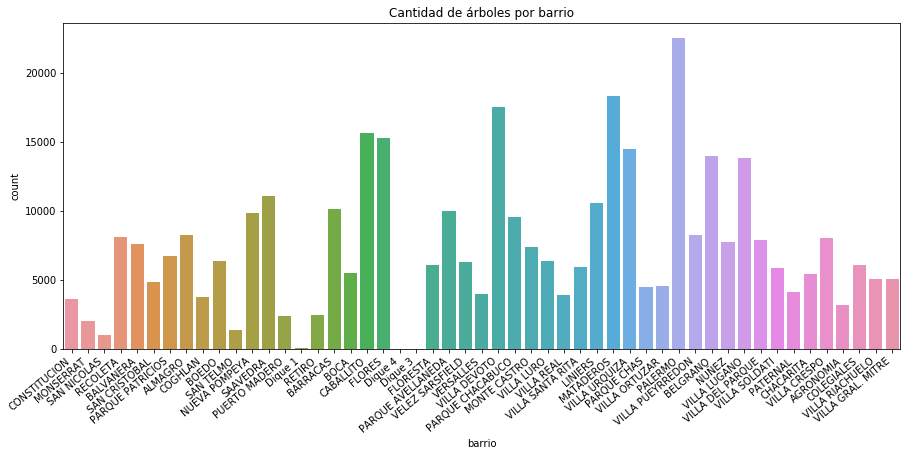

In [10]:
plt.figure (figsize=(15,6))
ax = sns.countplot(x="barrio", data=arboles)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title("Cantidad de árboles por barrio")

plt.show()

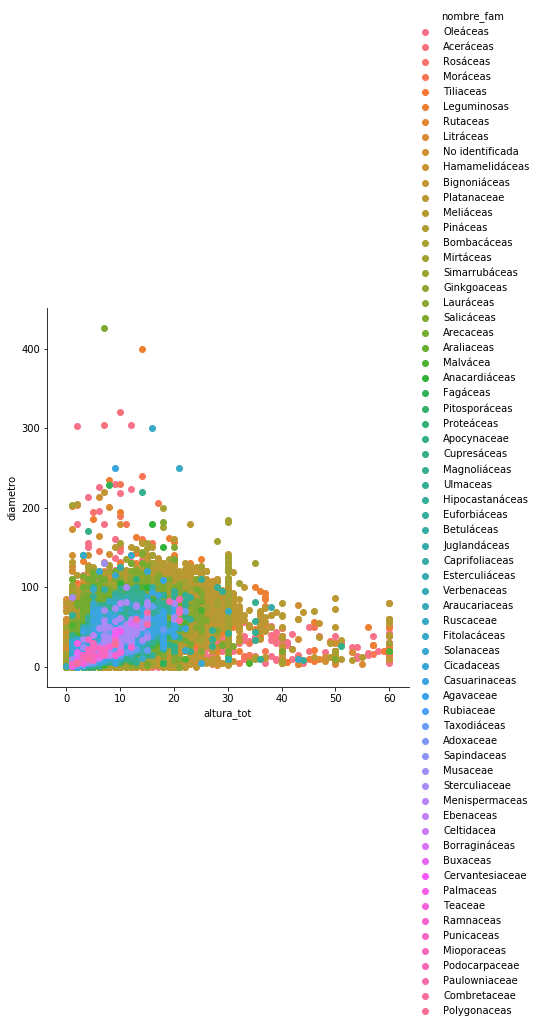

In [11]:
sns.FacetGrid(arboles, hue="nombre_fam", height=6) \
   .map(plt.scatter, "altura_tot", "diametro") \
   .add_legend()
plt.show()

In [12]:
print("tipo_sitio")
print(arboles['tipo_sitio'].unique())

tipo_sitio
['Árbol']


In [13]:
print("tipo_folla")
print(arboles['tipo_folla'].unique())

tipo_folla
['Árbol Latifoliado Caducifolio' 'Árbol Latifoliado Perenne'
 'No Determinado' 'Arbusto Perenne' 'Árbol Conífero Perenne' 'Palmera'
 'Arbusto o Herbacea' 'Arbusto Caducifolio' 'Árbol Conífero Caducifolio'
 'Miscelaneo']


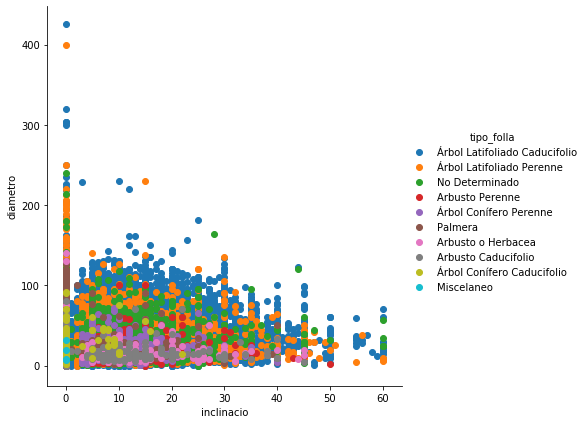

In [14]:
sns.FacetGrid(arboles, hue="tipo_folla", height=6) \
   .map(plt.scatter, "inclinacio", "diametro") \
   .add_legend()
plt.show()

In [15]:
print("origen")
print(arboles['origen'].unique())

origen
['Exótico' 'Nativo/Autóctono' 'No Determinado']


In [16]:
arboles = arboles.drop('tipo_sitio',1)

In [17]:
arboles.head()

,long,lat,id_arbol,altura_tot,diametro,inclinacio,id_especie,nombre_fam,nombre_gen,nombre_cie,nombre_com,tipo_folla,origen,codigo_man,barrio,comuna,calle,chapa1,chapa2
0,-58.389059,-34.620026,2430,7,20,17,1,Oleáceas,Fraxinus,Fraxinus pennsylvanica,Fresno americano,Árbol Latifoliado Caducifolio,Exótico,14-017,CONSTITUCION,1,"Calvo, Carlos",1609,0
1,-58.389211,-34.620034,2431,8,33,16,1,Oleáceas,Fraxinus,Fraxinus pennsylvanica,Fresno americano,Árbol Latifoliado Caducifolio,Exótico,14-017,CONSTITUCION,1,"Calvo, Carlos",1617,0
2,-58.389269,-34.620037,2432,2,3,0,9,Oleáceas,Ligustrum,Ligustrum lucidum,Ligustro,Árbol Latifoliado Perenne,Exótico,14-017,CONSTITUCION,1,"Calvo, Carlos",1629,0
3,-58.389525,-34.620052,2433,9,17,0,7,Aceráceas,Acer,Acer negundo,Arce negundo,Árbol Latifoliado Caducifolio,Exótico,14-017,CONSTITUCION,1,"Calvo, Carlos",0,0
4,-58.389608,-34.620057,2434,6,13,14,1,Oleáceas,Fraxinus,Fraxinus pennsylvanica,Fresno americano,Árbol Latifoliado Caducifolio,Exótico,14-017,CONSTITUCION,1,"Calvo, Carlos",1655,0


In [18]:
import geopandas as gpd
from shapely.geometry import Point
from geopandas import GeoDataFrame

In [19]:
geometry = [Point(xy) for xy in zip(arboles["long"], arboles["lat"])]
geometry[:3]

In [20]:
gdf = GeoDataFrame(arboles, geometry=geometry)

In [22]:
categorias = pd.get_dummies(arboles.tipo_folla)
categorias.head(3)

,Arbusto Caducifolio,Arbusto Perenne,Arbusto o Herbacea,Miscelaneo,No Determinado,Palmera,Árbol Conífero Caducifolio,Árbol Conífero Perenne,Árbol Latifoliado Caducifolio,Árbol Latifoliado Perenne
0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,1


In [23]:
arboles_cats = pd.concat([arboles, categorias], axis = 1)
arboles_cats.head(3)

,long,lat,id_arbol,altura_tot,diametro,inclinacio,id_especie,nombre_fam,nombre_gen,nombre_cie,...,Arbusto Caducifolio,Arbusto Perenne,Arbusto o Herbacea,Miscelaneo,No Determinado,Palmera,Árbol Conífero Caducifolio,Árbol Conífero Perenne,Árbol Latifoliado Caducifolio,Árbol Latifoliado Perenne
0,-58.389059,-34.620026,2430,7,20,17,1,Oleáceas,Fraxinus,Fraxinus pennsylvanica,...,0,0,0,0,0,0,0,0,1,0
1,-58.389211,-34.620034,2431,8,33,16,1,Oleáceas,Fraxinus,Fraxinus pennsylvanica,...,0,0,0,0,0,0,0,0,1,0
2,-58.389269,-34.620037,2432,2,3,0,9,Oleáceas,Ligustrum,Ligustrum lucidum,...,0,0,0,0,0,0,0,0,0,1


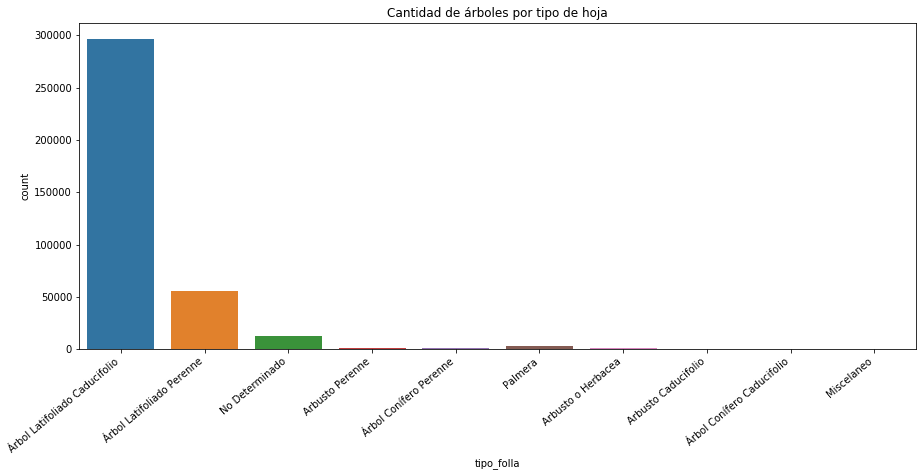

In [24]:
plt.figure (figsize=(15,6))
ax = sns.countplot(x="tipo_folla", data=arboles)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title("Cantidad de árboles por tipo de hoja")

plt.show()

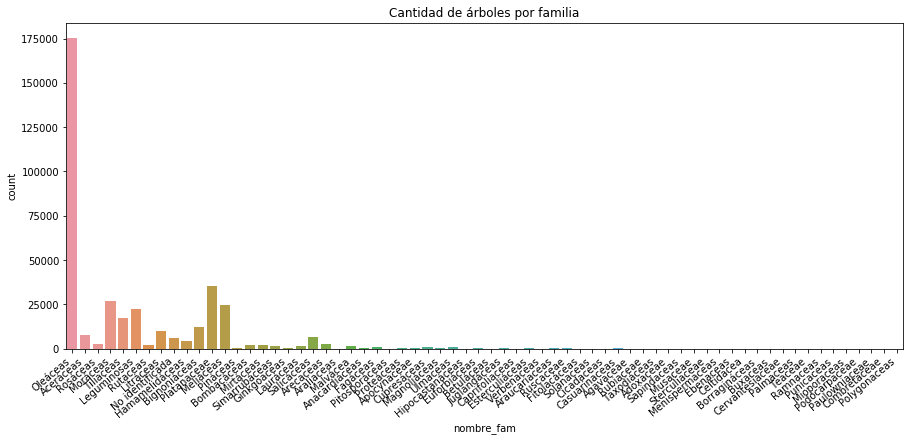

In [25]:
plt.figure (figsize=(15,6))
ax = sns.countplot(x="nombre_fam", data=arboles)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title("Cantidad de árboles por familia")

plt.show()

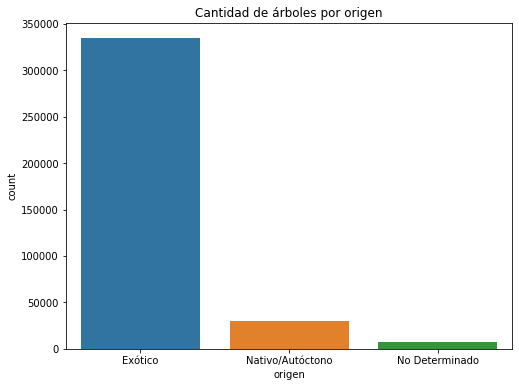

In [26]:
plt.figure (figsize=(8,6))
ax = sns.countplot(x="origen", data=arboles)
plt.title("Cantidad de árboles por origen")

plt.show()

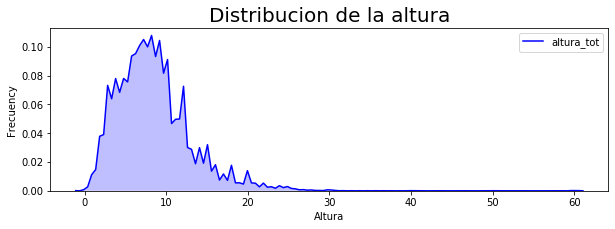

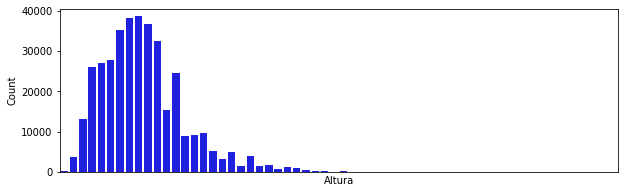

In [27]:
plt.figure(figsize=(10,3))
sns.kdeplot(arboles.altura_tot, color="Blue", shade = True)
plt.xlabel("Altura")
plt.ylabel("Frecuency")
plt.title('Distribucion de la altura',size = 20)
plt.show()

plt.figure(figsize=(10,3))
sns.countplot(arboles.altura_tot, color="Blue")
plt.xlabel("Altura")
plt.ylabel("Count")
plt.xticks([])
plt.show()

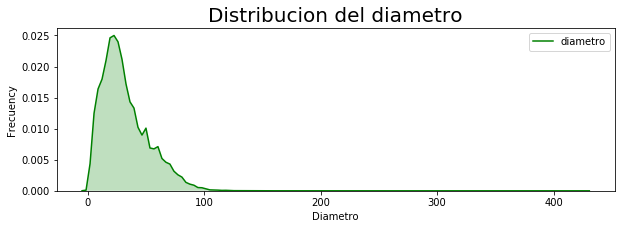

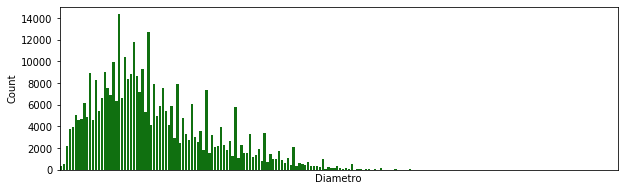

In [28]:
plt.figure(figsize=(10,3))
sns.kdeplot(arboles.diametro, color="Green", shade = True)
plt.xlabel("Diametro")
plt.ylabel("Frecuency")
plt.title('Distribucion del diametro',size = 20)
plt.show()

plt.figure(figsize=(10,3))
sns.countplot(arboles.diametro, color="Green")
plt.xlabel("Diametro")
plt.ylabel("Count")
plt.xticks([])
plt.show()

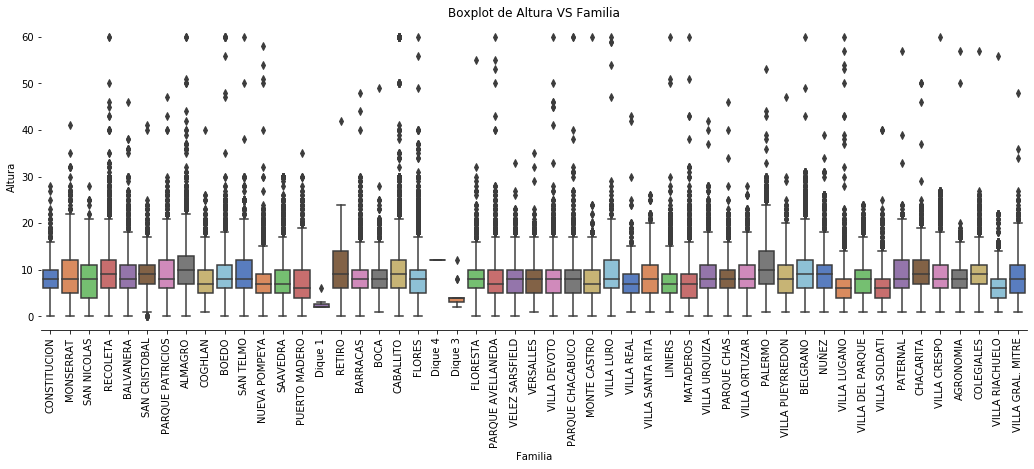

In [29]:
g = sns.catplot(x="barrio",y="altura_tot",data=arboles, kind="box", height = 5 ,aspect=3,palette = "muted")
g.despine(left=True) # Para quitar los el eje Y del plot
g.set_xticklabels(rotation=90)

plt.xlabel("Familia")
plt.ylabel("Altura")
plt.title('Boxplot de Altura VS Familia',size = 12)
plt.show()

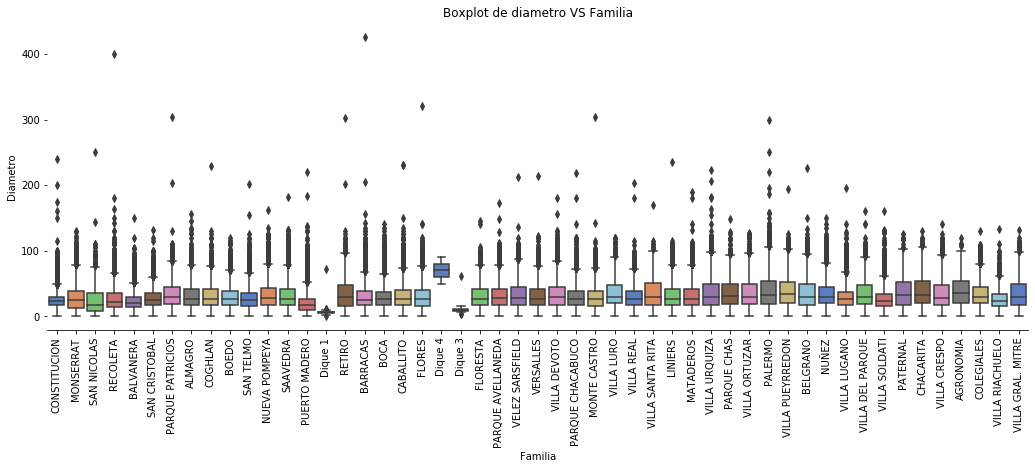

In [30]:
g = sns.catplot(x="barrio",y="diametro",data=arboles, kind="box", height = 5 ,aspect=3,palette = "muted")
g.despine(left=True) # Para quitar los el eje Y del plot
g.set_xticklabels(rotation=90)

plt.xlabel("Familia")
plt.ylabel("Diametro")
plt.title('Boxplot de diametro VS Familia',size = 12)
plt.show()

In [31]:
print("nombre_gen")
print(arboles['nombre_fam'].unique())

nombre_gen
['Oleáceas' 'Aceráceas' 'Rosáceas' 'Moráceas' 'Tiliaceas' 'Leguminosas'
 'Rutaceas' 'Litráceas' 'No identificada' 'Hamamelidáceas' 'Bignoniáceas'
 'Platanaceae' 'Meliáceas' 'Pináceas' 'Bombacáceas' 'Mirtáceas'
 'Simarrubáceas' 'Ginkgoaceas' 'Lauráceas' 'Salicáceas' 'Arecaceas'
 'Araliaceas' 'Malvácea' 'Anacardiáceas' 'Fagáceas' 'Pitosporáceas'
 'Proteáceas' 'Apocynaceae' 'Cupresáceas' 'Magnoliáceas' 'Ulmaceas'
 'Hipocastanáceas' 'Euforbiáceas' 'Betuláceas' 'Juglandáceas'
 'Caprifoliaceas' 'Esterculiáceas' 'Verbenaceas' 'Araucariaceas'
 'Ruscaceae' 'Fitolacáceas' 'Solanaceas' 'Cicadaceas' 'Casuarinaceas'
 'Agavaceae' 'Rubiaceae' 'Taxodiáceas' 'Adoxaceae' 'Sapindaceas'
 'Musaceae' 'Sterculiaceae' 'Menispermaceas' 'Ebenaceas' 'Celtidacea'
 'Borragináceas' 'Buxaceas' 'Cervantesiaceae' 'Palmaceas' 'Teaceae'
 'Ramnaceas' 'Punicaceas' 'Mioporaceas' 'Podocarpaceae' 'Paulowniaceae'
 'Combretaceae' 'Polygonaceas']


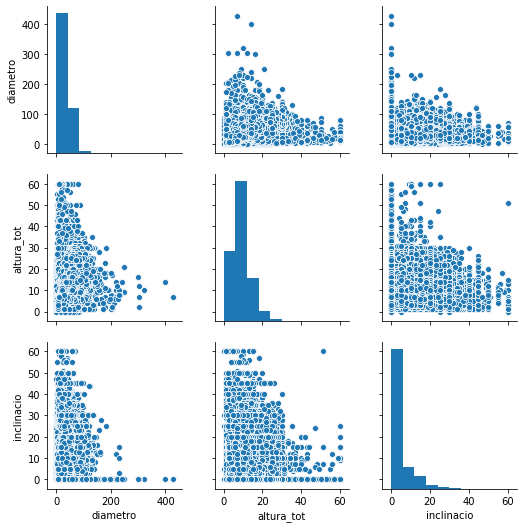

In [32]:
sns.pairplot(arboles[["diametro", "altura_tot", "inclinacio", "nombre_fam", "tipo_folla"]])
plt.show()

In [33]:
print("calle")
print(arboles['calle'].unique())

calle
['Calvo, Carlos' 'Solis' 'Estados Unidos' ... 'Sno (Alt Necochea 100)'
 'Galvez, Manuel' 'El Araucano']


In [34]:
categorias2 = pd.get_dummies(arboles.barrio)
categorias2.head(3)

,AGRONOMIA,ALMAGRO,BALVANERA,BARRACAS,BELGRANO,BOCA,BOEDO,CABALLITO,CHACARITA,COGHLAN,...,VILLA GRAL. MITRE,VILLA LUGANO,VILLA LURO,VILLA ORTUZAR,VILLA PUEYRREDON,VILLA REAL,VILLA RIACHUELO,VILLA SANTA RITA,VILLA SOLDATI,VILLA URQUIZA
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
categorias3 = pd.get_dummies(arboles.nombre_fam)
categorias3.head(3)

,Aceráceas,Adoxaceae,Agavaceae,Anacardiáceas,Apocynaceae,Araliaceas,Araucariaceas,Arecaceas,Betuláceas,Bignoniáceas,...,Salicáceas,Sapindaceas,Simarrubáceas,Solanaceas,Sterculiaceae,Taxodiáceas,Teaceae,Tiliaceas,Ulmaceas,Verbenaceas
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
categorias4 = pd.get_dummies(arboles.origen)
categorias4.head(3)

,Exótico,Nativo/Autóctono,No Determinado
0,1,0,0
1,1,0,0
2,1,0,0


In [37]:
arboles = arboles.drop('chapa1',1)

In [38]:
arboles = arboles.drop('chapa2',1)

In [39]:
arboles = arboles.drop(['codigo_man','calle','comuna'],1)

In [40]:
arboles = arboles.drop('geometry',1)

In [41]:
arboles.head(30)

,long,lat,id_arbol,altura_tot,diametro,inclinacio,id_especie,nombre_fam,nombre_gen,nombre_cie,nombre_com,tipo_folla,origen,barrio
0,-58.389059,-34.620026,2430,7,20,17,1,Oleáceas,Fraxinus,Fraxinus pennsylvanica,Fresno americano,Árbol Latifoliado Caducifolio,Exótico,CONSTITUCION
1,-58.389211,-34.620034,2431,8,33,16,1,Oleáceas,Fraxinus,Fraxinus pennsylvanica,Fresno americano,Árbol Latifoliado Caducifolio,Exótico,CONSTITUCION
2,-58.389269,-34.620037,2432,2,3,0,9,Oleáceas,Ligustrum,Ligustrum lucidum,Ligustro,Árbol Latifoliado Perenne,Exótico,CONSTITUCION
3,-58.389525,-34.620052,2433,9,17,0,7,Aceráceas,Acer,Acer negundo,Arce negundo,Árbol Latifoliado Caducifolio,Exótico,CONSTITUCION
4,-58.389608,-34.620057,2434,6,13,14,1,Oleáceas,Fraxinus,Fraxinus pennsylvanica,Fresno americano,Árbol Latifoliado Caducifolio,Exótico,CONSTITUCION
5,-58.389665,-34.620060,2435,3,2,0,28,Rosáceas,Prunus,Prunus cerasifera,Ciruelo de jardín,Árbol Latifoliado Caducifolio,Exótico,CONSTITUCION
6,-58.389739,-34.620064,2436,17,43,10,1,Oleáceas,Fraxinus,Fraxinus pennsylvanica,Fresno americano,Árbol Latifoliado Caducifolio,Exótico,CONSTITUCION
7,-58.389830,-34.620069,2437,10,24,10,1,Oleáceas,Fraxinus,Fraxinus pennsylvanica,Fresno americano,Árbol Latifoliado Caducifolio,Exótico,CONSTITUCION
8,-58.389913,-34.620074,2438,6,17,21,1,Oleáceas,Fraxinus,Fraxinus pennsylvanica,Fresno americano,Árbol Latifoliado Caducifolio,Exótico,CONSTITUCION
9,-58.390163,-34.620018,2440,15,29,0,1,Oleáceas,Fraxinus,Fraxinus pennsylvanica,Fresno americano,Árbol Latifoliado Caducifolio,Exótico,CONSTITUCION


In [42]:
arboles = arboles.drop('id_arbol',1)

In [43]:
print("nombre_com")
print(arboles['nombre_com'].unique())

nombre_com
['Fresno americano' 'Ligustro' 'Arce negundo' 'Ciruelo de jardín' 'Ficus'
 'Tilo' 'Acacia blanca' 'Pata de vaca  (Pezuña de vaca)' 'Mandarino'
 'Crespón (Àrbol de Júpiter)' 'Ceibo' 'No Determinable' 'Liquidambar'
 'Jacarandá' 'Ligustro disciplinado (Ligustro variegado)' 'Tipa blanca'
 'Plátano' 'Fotinia' 'Paraíso' 'Fresno (Fresno común)'
 'Acacia de constantinopla' 'Arce plateado (Arce blanco)'
 'Cedro del Himalaya' 'Palo borracho rosado' 'Ficus variegado'
 'Limpiatubos' 'Árbol del cielo (Ailanto o Árbol de los dioses)' 'Ginkgo'
 'Laurel' 'Sauce eléctrico' 'Visco (Viscote, Arca)' 'Fenix'
 'Lapacho rosado' 'Cheflera' 'Níspero japonés' 'Acacia bola' 'Gomero'
 'Rosa de China (Hibisco)' 'Timbó (Oreja de negro)' 'Naranjo amargo'
 'Falso Alcanforero' 'Palmera china' 'Sauce criollo' 'Pindó' 'Aguaribay'
 'Álamo carolina' 'Roble común' 'Rosa de Siria' 'Azarero'
 'Palo borracho blanco' 'Sófora japónica' 'Mimosa (Aromo francés)' 'Palto'
 'Roble sedoso (Grevillea)' 'Lapacho amarillo' 'E

In [44]:
arboles = arboles.drop('nombre_cie',1)

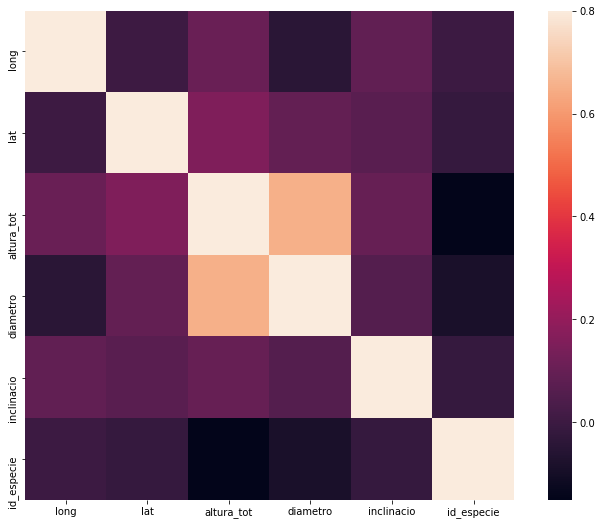

In [45]:
corrmat = arboles.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [46]:
arboles.head()

,long,lat,altura_tot,diametro,inclinacio,id_especie,nombre_fam,nombre_gen,nombre_com,tipo_folla,origen,barrio
0,-58.389059,-34.620026,7,20,17,1,Oleáceas,Fraxinus,Fresno americano,Árbol Latifoliado Caducifolio,Exótico,CONSTITUCION
1,-58.389211,-34.620034,8,33,16,1,Oleáceas,Fraxinus,Fresno americano,Árbol Latifoliado Caducifolio,Exótico,CONSTITUCION
2,-58.389269,-34.620037,2,3,0,9,Oleáceas,Ligustrum,Ligustro,Árbol Latifoliado Perenne,Exótico,CONSTITUCION
3,-58.389525,-34.620052,9,17,0,7,Aceráceas,Acer,Arce negundo,Árbol Latifoliado Caducifolio,Exótico,CONSTITUCION
4,-58.389608,-34.620057,6,13,14,1,Oleáceas,Fraxinus,Fresno americano,Árbol Latifoliado Caducifolio,Exótico,CONSTITUCION


In [47]:
arboles = arboles.drop('nombre_gen',1)

In [48]:
arboles = arboles.drop('id_especie',1)

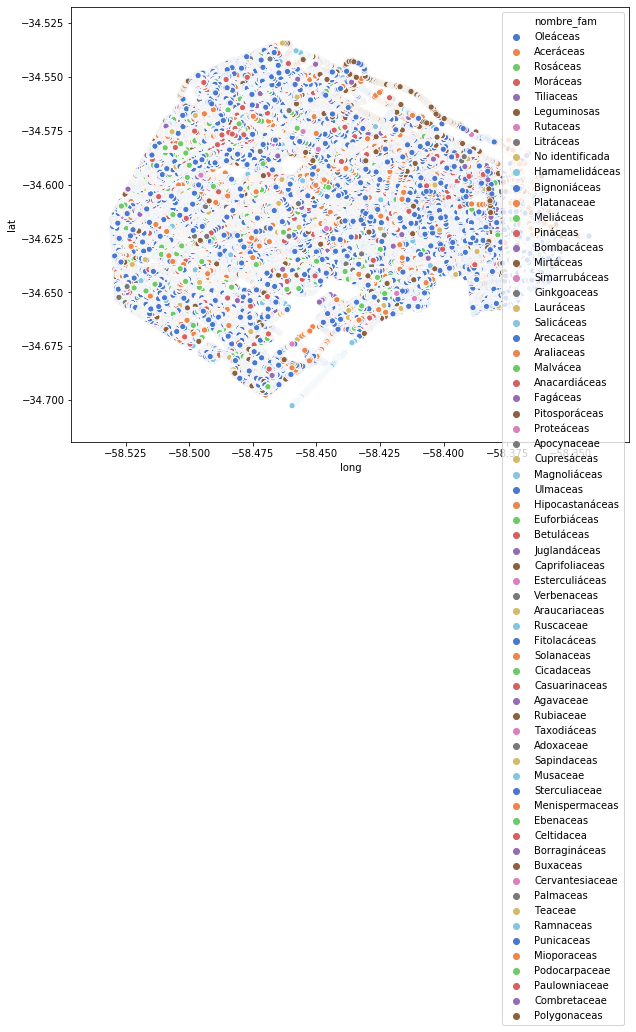

In [8]:
plt.figure(figsize=(10,8))
sns.scatterplot(arboles.long, arboles.lat, hue=arboles.nombre_fam, palette='muted')
plt.show()

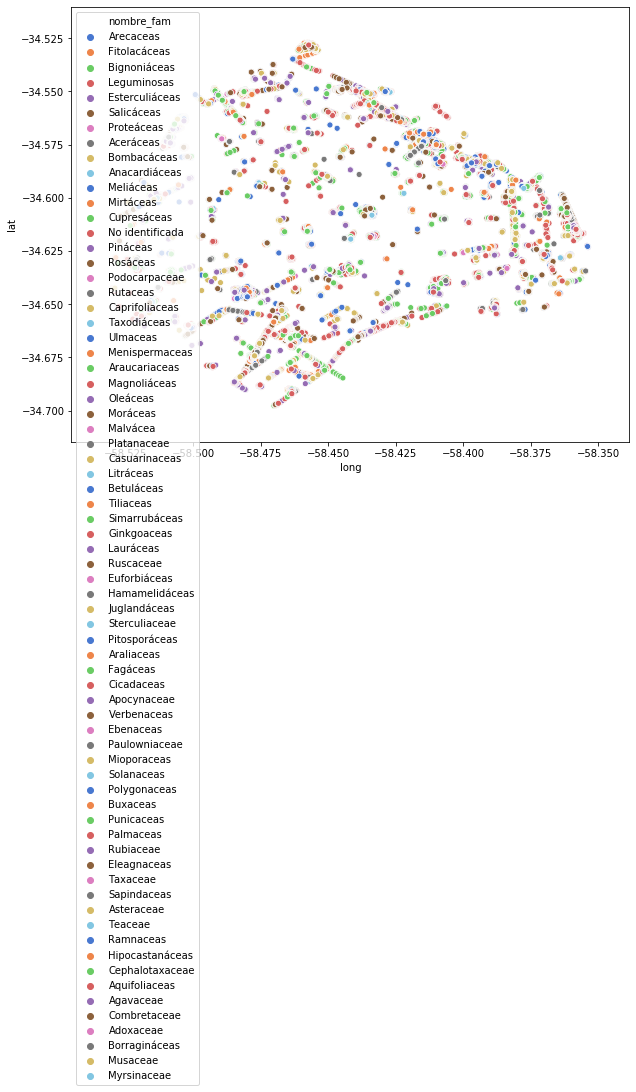

In [9]:
plt.figure(figsize=(10,8))
sns.scatterplot(arboles_parque.long, arboles_parque.lat, hue=arboles_parque.nombre_fam, palette='muted')
plt.show()

In [50]:
arboles1 = pd.concat([arboles, categorias, categorias2, categorias3, categorias4], axis=1)

In [51]:
arboles1.describe()

,long,lat,altura_tot,diametro,inclinacio,Arbusto Caducifolio,Arbusto Perenne,Arbusto o Herbacea,Miscelaneo,No Determinado,...,Solanaceas,Sterculiaceae,Taxodiáceas,Teaceae,Tiliaceas,Ulmaceas,Verbenaceas,Exótico,Nativo/Autóctono,No Determinado
count,372694.000000,372694.000000,372694.000000,372694.000000,372694.000000,372694.000000,372694.000000,372694.000000,372694.000000,372694.000000,...,372694.000000,372694.000000,372694.000000,372694.000000,372694.000000,372694.000000,372694.000000,372694.000000,372694.000000,372694.000000
mean,-58.458557,-34.613312,8.473085,31.941351,3.069811,0.001277,0.003343,0.002246,0.000011,0.034240,...,0.000078,0.000284,0.000174,0.000008,0.046918,0.002399,0.000040,0.897527,0.081595,0.020878
std,0.041818,0.034253,4.576827,20.207274,6.029941,0.035715,0.057724,0.047337,0.003276,0.181845,...,0.008821,0.016862,0.013205,0.002837,0.211463,0.048918,0.006344,0.303269,0.273747,0.142975
min,-58.530413,-34.702639,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-58.491353,-34.639264,5.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,-58.465525,-34.615745,8.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,-58.428723,-34.586780,11.000000,43.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,-58.342784,-34.534262,60.000000,426.000000,60.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [52]:
arboles1.shape

(372694, 140)

In [53]:
arboles1.head()

,long,lat,altura_tot,diametro,inclinacio,nombre_fam,nombre_com,tipo_folla,origen,barrio,...,Solanaceas,Sterculiaceae,Taxodiáceas,Teaceae,Tiliaceas,Ulmaceas,Verbenaceas,Exótico,Nativo/Autóctono,No Determinado
0,-58.389059,-34.620026,7,20,17,Oleáceas,Fresno americano,Árbol Latifoliado Caducifolio,Exótico,CONSTITUCION,...,0,0,0,0,0,0,0,1,0,0
1,-58.389211,-34.620034,8,33,16,Oleáceas,Fresno americano,Árbol Latifoliado Caducifolio,Exótico,CONSTITUCION,...,0,0,0,0,0,0,0,1,0,0
2,-58.389269,-34.620037,2,3,0,Oleáceas,Ligustro,Árbol Latifoliado Perenne,Exótico,CONSTITUCION,...,0,0,0,0,0,0,0,1,0,0
3,-58.389525,-34.620052,9,17,0,Aceráceas,Arce negundo,Árbol Latifoliado Caducifolio,Exótico,CONSTITUCION,...,0,0,0,0,0,0,0,1,0,0
4,-58.389608,-34.620057,6,13,14,Oleáceas,Fresno americano,Árbol Latifoliado Caducifolio,Exótico,CONSTITUCION,...,0,0,0,0,0,0,0,1,0,0


In [54]:
arboles1 = arboles1.drop(['lat','long', 'nombre_fam', 'tipo_folla', 'origen', 'barrio'],1)

In [55]:
arboles1.head()

,altura_tot,diametro,inclinacio,nombre_com,Arbusto Caducifolio,Arbusto Perenne,Arbusto o Herbacea,Miscelaneo,No Determinado,Palmera,...,Solanaceas,Sterculiaceae,Taxodiáceas,Teaceae,Tiliaceas,Ulmaceas,Verbenaceas,Exótico,Nativo/Autóctono,No Determinado
0,7,20,17,Fresno americano,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,8,33,16,Fresno americano,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2,3,0,Ligustro,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,9,17,0,Arce negundo,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,6,13,14,Fresno americano,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
